In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


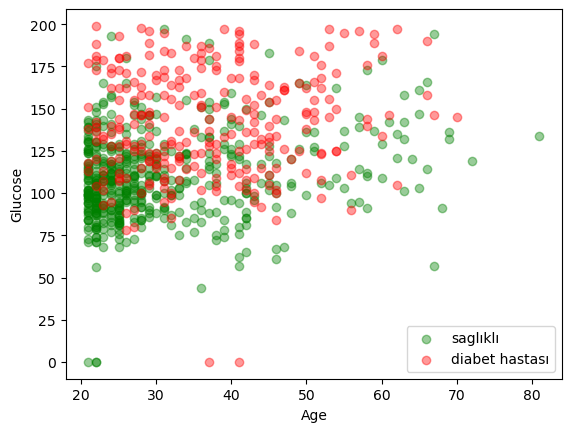

In [11]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]

plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose,color="green", label ="saglıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label = "diabet hastası",alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [35]:
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)- np.min(x_ham_veri))

print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())

print("\n\nNormalization sonrası yapay zekaya eğitim vereceğimiz veriler:\n")
print(x.head())


Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


Normalization sonrası yapay zekaya eğitim vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.2163

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu", knn.score(x_test,y_test))




K=3 için test verilerimizin doğrulama testi sonucu 0.7402597402597403


In [39]:
sayac = 1
for k in range (1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac,"   ","Doğruluk oranı : %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1     Doğruluk oranı : % 72.07792207792207
2     Doğruluk oranı : % 72.72727272727273
3     Doğruluk oranı : % 74.02597402597402
4     Doğruluk oranı : % 72.07792207792207
5     Doğruluk oranı : % 73.37662337662337
6     Doğruluk oranı : % 77.27272727272727
7     Doğruluk oranı : % 75.97402597402598
8     Doğruluk oranı : % 76.62337662337663
9     Doğruluk oranı : % 76.62337662337663
10     Doğruluk oranı : % 75.97402597402598
